In [38]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)


options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

# Feature selection

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

After 13 iterations, +1.2 mins: 

 confirmed 10 attributes: centreCode, degenzaPreTra, intermedLactates, IntraoperativTransfected, new_admWard and 5 more;

 rejected 39 attributes: age, anastomTechnic, bileAnastomosis, clifSofaForCardio, comorbidities_cardiovascolari and 34 more;

 still have 28 attributes left.


 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

 18. run of importance source...

After 18 iterations, +1.3 mins: 

 rejected 9 attributes: BleedingEsophagGastric,

 [1] "centreCode"               "degenzaPreTra"           
 [3] "thrombosisDegreeWithNone" "albumInfusOver7Days"     
 [5] "ratioPaO2FiO2"            "platCountTranspl"        
 [7] "albumina"                 "surgeryDuration"         
 [9] "IntraoperativTransfected" "plasmaFresco"            
[11] "plasmaPools"              "doseFibrinogen"          
[13] "CristalloidiComp"         "Albumina50Comp"          
[15] "noradrenalineEndSurger"   "intermedLactates"        
[17] "syndromeReperfus"         "venousBypass"            
[19] "abdomOpenEndSurg"         "scoreCHILD"              
[21] "organDonorType"           "organDonorSampleTechnic" 
[23] "realMELD"                 "new_admWard"             
[25] "EPScum"                   "comorbidities_renali"    


ERROR: Error in match.fun(FUN): l'argomento "FUN"  non è specificato e non ha un valore predefinito


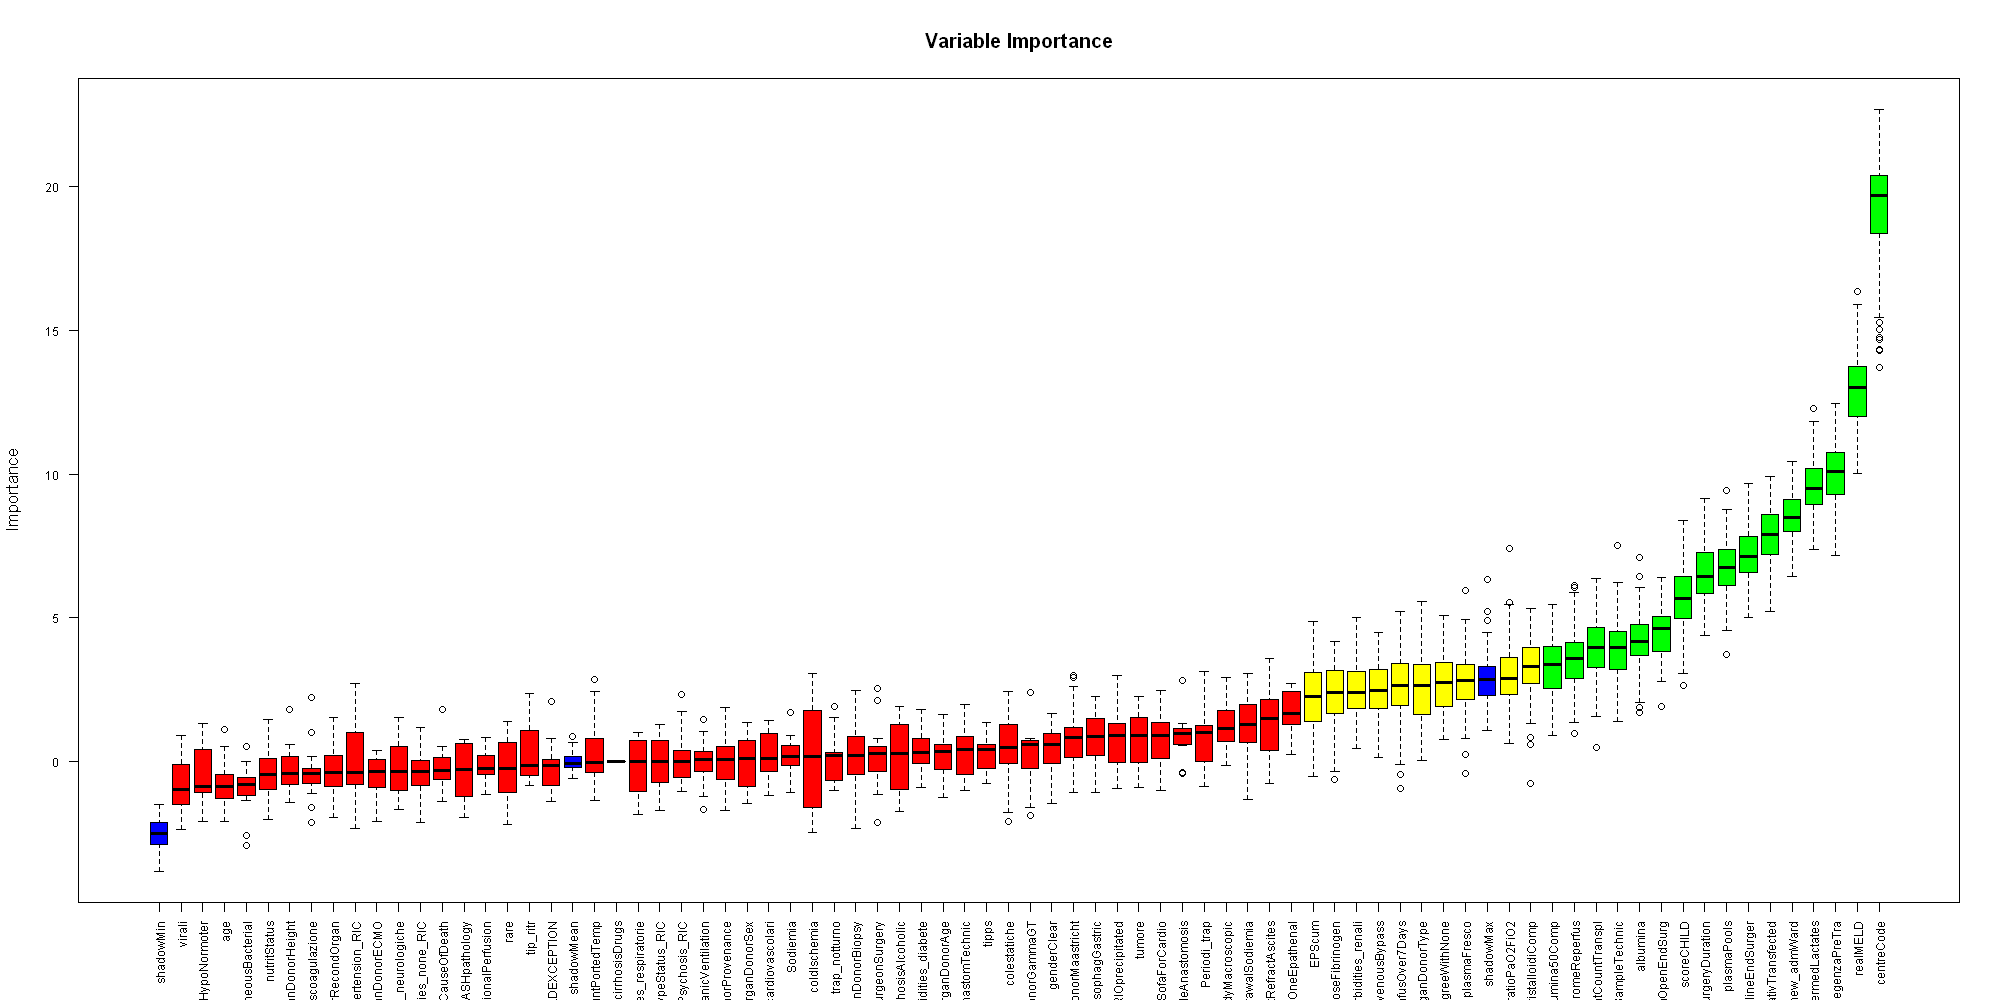

In [39]:
library(Boruta)
# Decide if a variable is important or not using Boruta
boruta_output <- Boruta(deg_cat ~ ., data=df, doTrace=2)  # perform Boruta search


boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])  # collect Confirmed and Tentative variables
print(boruta_signif)  # significant variables


plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  # plot variable importance


df_boruta <- df[,boruta_signif]

df_boruta <- apply(select_if(df,is.matrix),as.numeric)

df_boruta$deg_cat <- df$deg_cat

## Data partition

In [47]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)
TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)



In [48]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df_boruta$deg_cat, SplitRatio = 0.7)
trainB  <- subset(df_boruta, sample == TRUE)
testB   <- subset(df_boruta, sample == FALSE)


TrainClassesB <- trainB$deg_cat
TrainDataB <- subset(trainB,select= -deg_cat)
TestClassesB <- testB$deg_cat
TestDataB <- subset(testB,select= -deg_cat)


## Models

In [49]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [50]:
model_knn <- train(x=TrainData, y=TrainClasses, 
               method = "kknn",
               trControl = ctrl) 

+ Fold01.Rep1: kmax=13, distance=1.208, kernel=biweight 
- Fold01.Rep1: kmax=13, distance=1.208, kernel=biweight 
+ Fold01.Rep1: kmax=13, distance=2.700, kernel=triangular 
- Fold01.Rep1: kmax=13, distance=2.700, kernel=triangular 
+ Fold01.Rep1: kmax=10, distance=1.518, kernel=triangular 
- Fold01.Rep1: kmax=10, distance=1.518, kernel=triangular 
+ Fold02.Rep1: kmax=13, distance=1.208, kernel=biweight 
- Fold02.Rep1: kmax=13, distance=1.208, kernel=biweight 
+ Fold02.Rep1: kmax=13, distance=2.700, kernel=triangular 
- Fold02.Rep1: kmax=13, distance=2.700, kernel=triangular 
+ Fold02.Rep1: kmax=10, distance=1.518, kernel=triangular 
- Fold02.Rep1: kmax=10, distance=1.518, kernel=triangular 
+ Fold03.Rep1: kmax=13, distance=1.208, kernel=biweight 
- Fold03.Rep1: kmax=13, distance=1.208, kernel=biweight 
+ Fold03.Rep1: kmax=13, distance=2.700, kernel=triangular 
- Fold03.Rep1: kmax=13, distance=2.700, kernel=triangular 
+ Fold03.Rep1: kmax=10, distance=1.518, kernel=triangular 
- Fold03.

In [51]:
model_knnB <- train(x=TrainDataB, y=TrainClassesB, 
               method = "kknn",
               trControl = ctrl) 

+ Fold01.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
- Fold01.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
+ Fold01.Rep1: kmax=166, distance=1.6570, kernel=triangular 
- Fold01.Rep1: kmax=166, distance=1.6570, kernel=triangular 
+ Fold01.Rep1: kmax=238, distance=0.2976, kernel=rectangular 
- Fold01.Rep1: kmax=238, distance=0.2976, kernel=rectangular 
+ Fold02.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
- Fold02.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
+ Fold02.Rep1: kmax=166, distance=1.6570, kernel=triangular 
- Fold02.Rep1: kmax=166, distance=1.6570, kernel=triangular 
+ Fold02.Rep1: kmax=238, distance=0.2976, kernel=rectangular 
- Fold02.Rep1: kmax=238, distance=0.2976, kernel=rectangular 
+ Fold03.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
- Fold03.Rep1: kmax=193, distance=1.5942, kernel=rectangular 
+ Fold03.Rep1: kmax=166, distance=1.6570, kernel=triangular 
- Fold03.Rep1: kmax=166, distance=1.6570, kernel=triangular 
+ Fold03.Rep1:

## Results

k-Nearest Neighbors 

747 samples
 77 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 672, 673, 671, 673, 672, 671, ... 
Resampling results across tuning parameters:

  kmax  distance  kernel      Accuracy   Kappa    
  10    1.517646  triangular  0.4994580  0.1467226
  13    1.207518  biweight    0.4874561  0.1396788
  13    2.700098  triangular  0.5153542  0.1622994

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 13, distance = 2.700098
 and kernel = triangular.


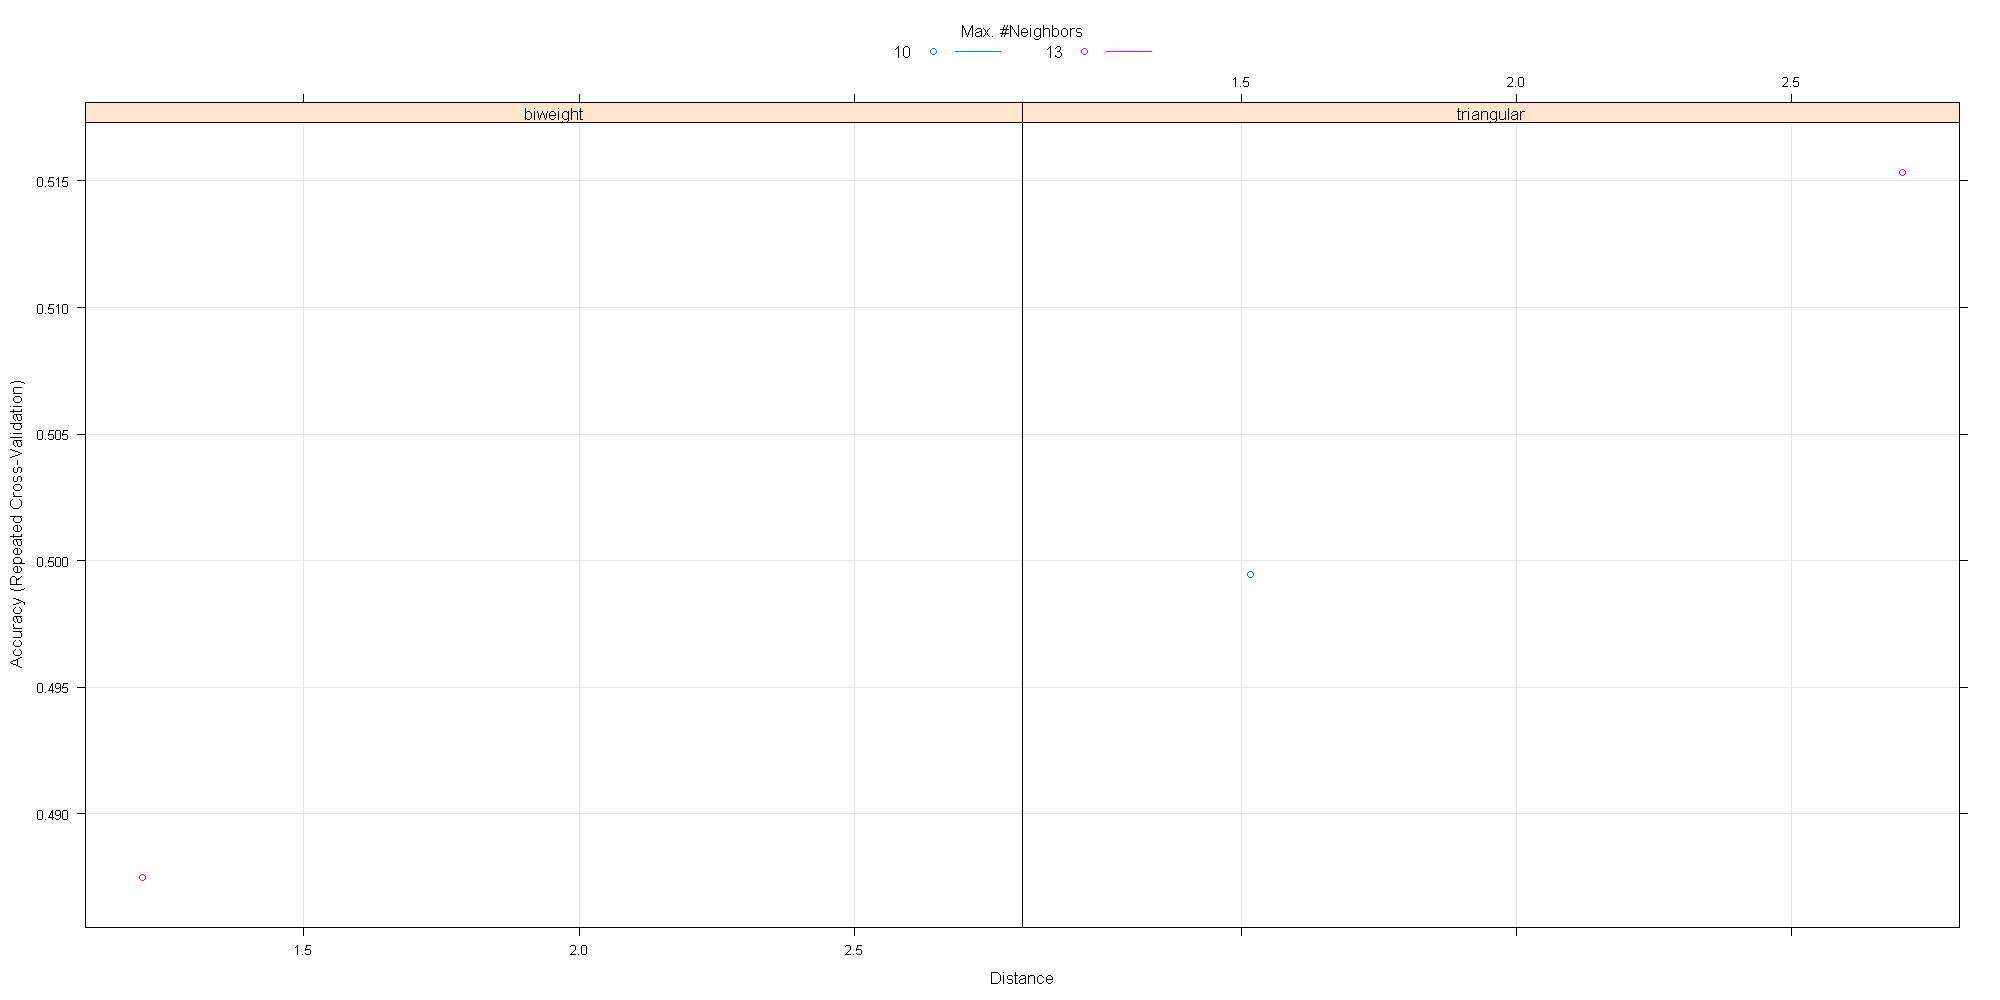

In [57]:
print(model_knn)
plot(model_knn)

k-Nearest Neighbors 

747 samples
 26 predictor
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 673, 671, 672, 672, 673, 672, ... 
Resampling results across tuning parameters:

  kmax  distance   kernel       Accuracy   Kappa    
  166   1.6569545  triangular   0.5835344  0.2559497
  193   1.5941704  rectangular  0.5714263  0.2331977
  238   0.2975957  rectangular  0.5460370  0.1834292

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 166, distance = 1.656955
 and kernel = triangular.


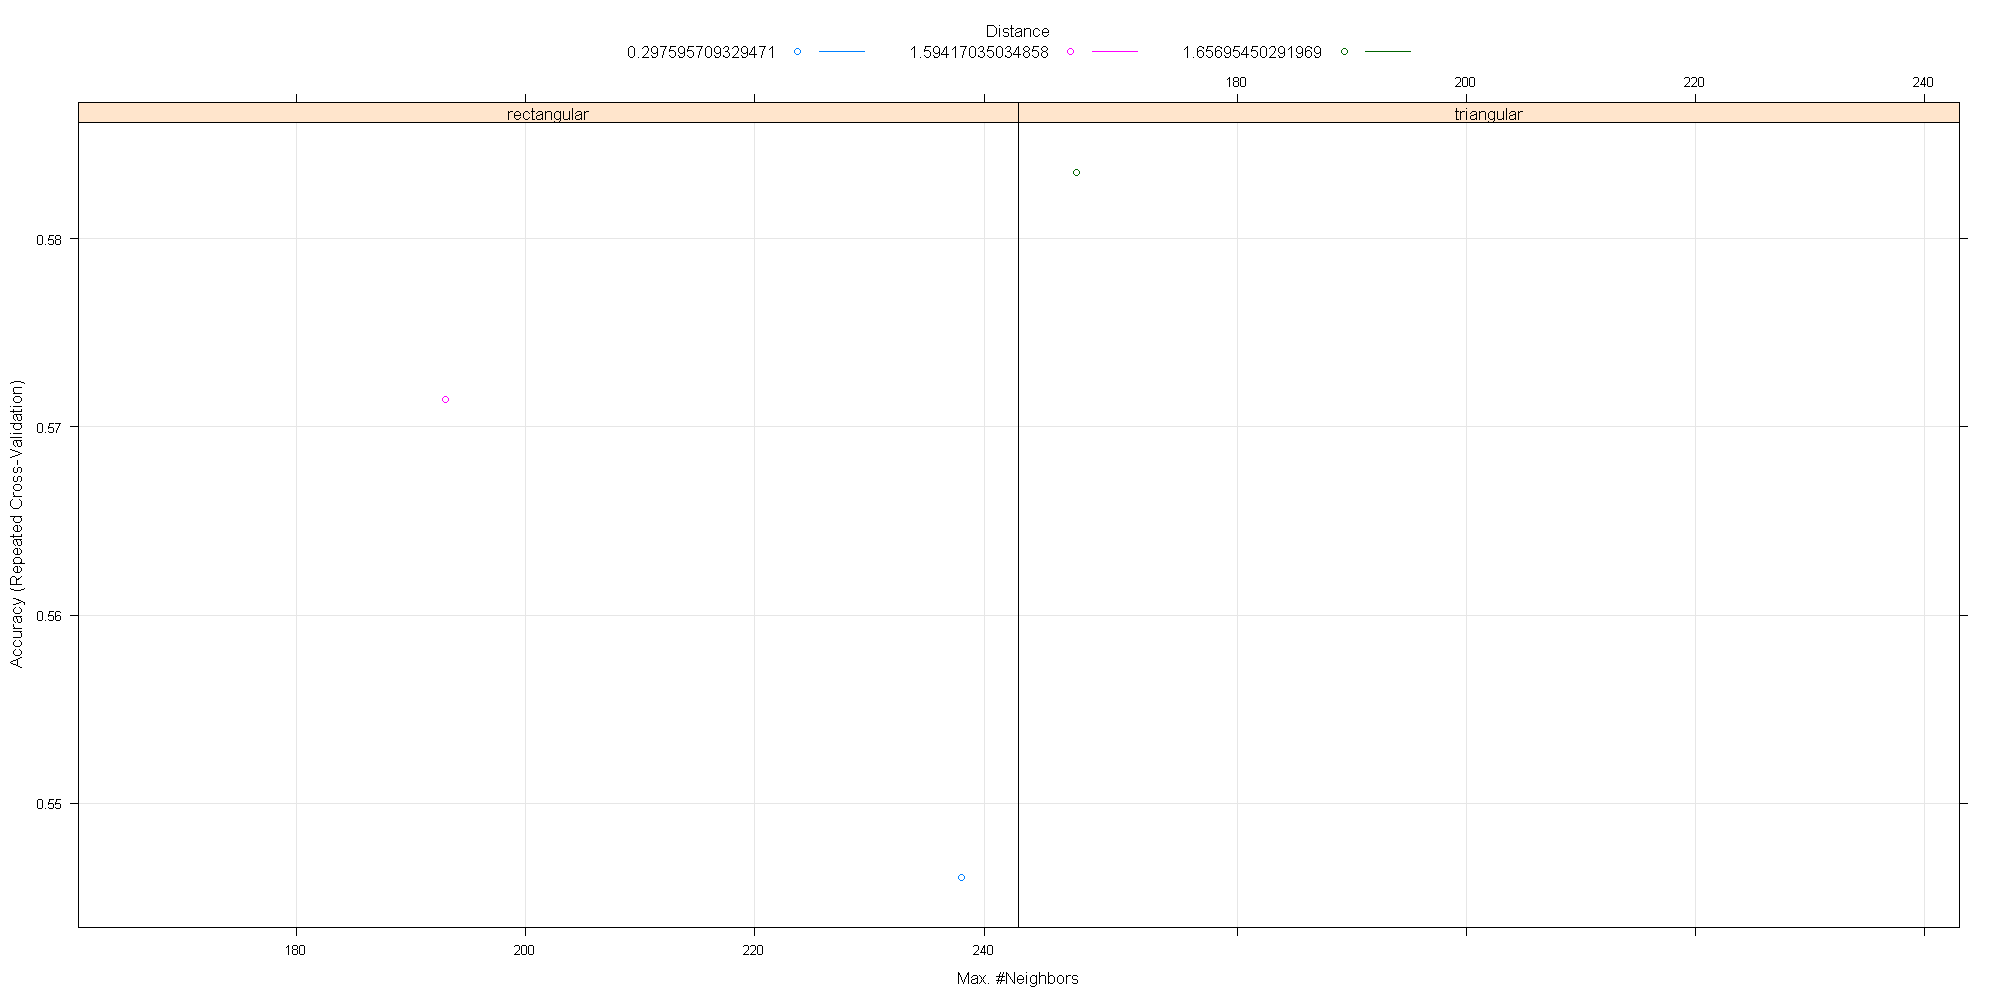

In [58]:
print(model_knnB)
plot(model_knnB)


Call:
summary.resamples(object = results)

Models: knn, knn_boruta 
Number of resamples: 10 

Accuracy 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
knn        0.4533333 0.4645946 0.5197368 0.5153542 0.5448684 0.5945946    0
knn_boruta 0.4533333 0.4645946 0.5197368 0.5153542 0.5448684 0.5945946    0

Kappa 
                 Min.    1st Qu.    Median      Mean   3rd Qu.      Max. NA's
knn        0.01725791 0.09342813 0.1606909 0.1622994 0.2026344 0.3131188    0
knn_boruta 0.01725791 0.09342813 0.1606909 0.1622994 0.2026344 0.3131188    0


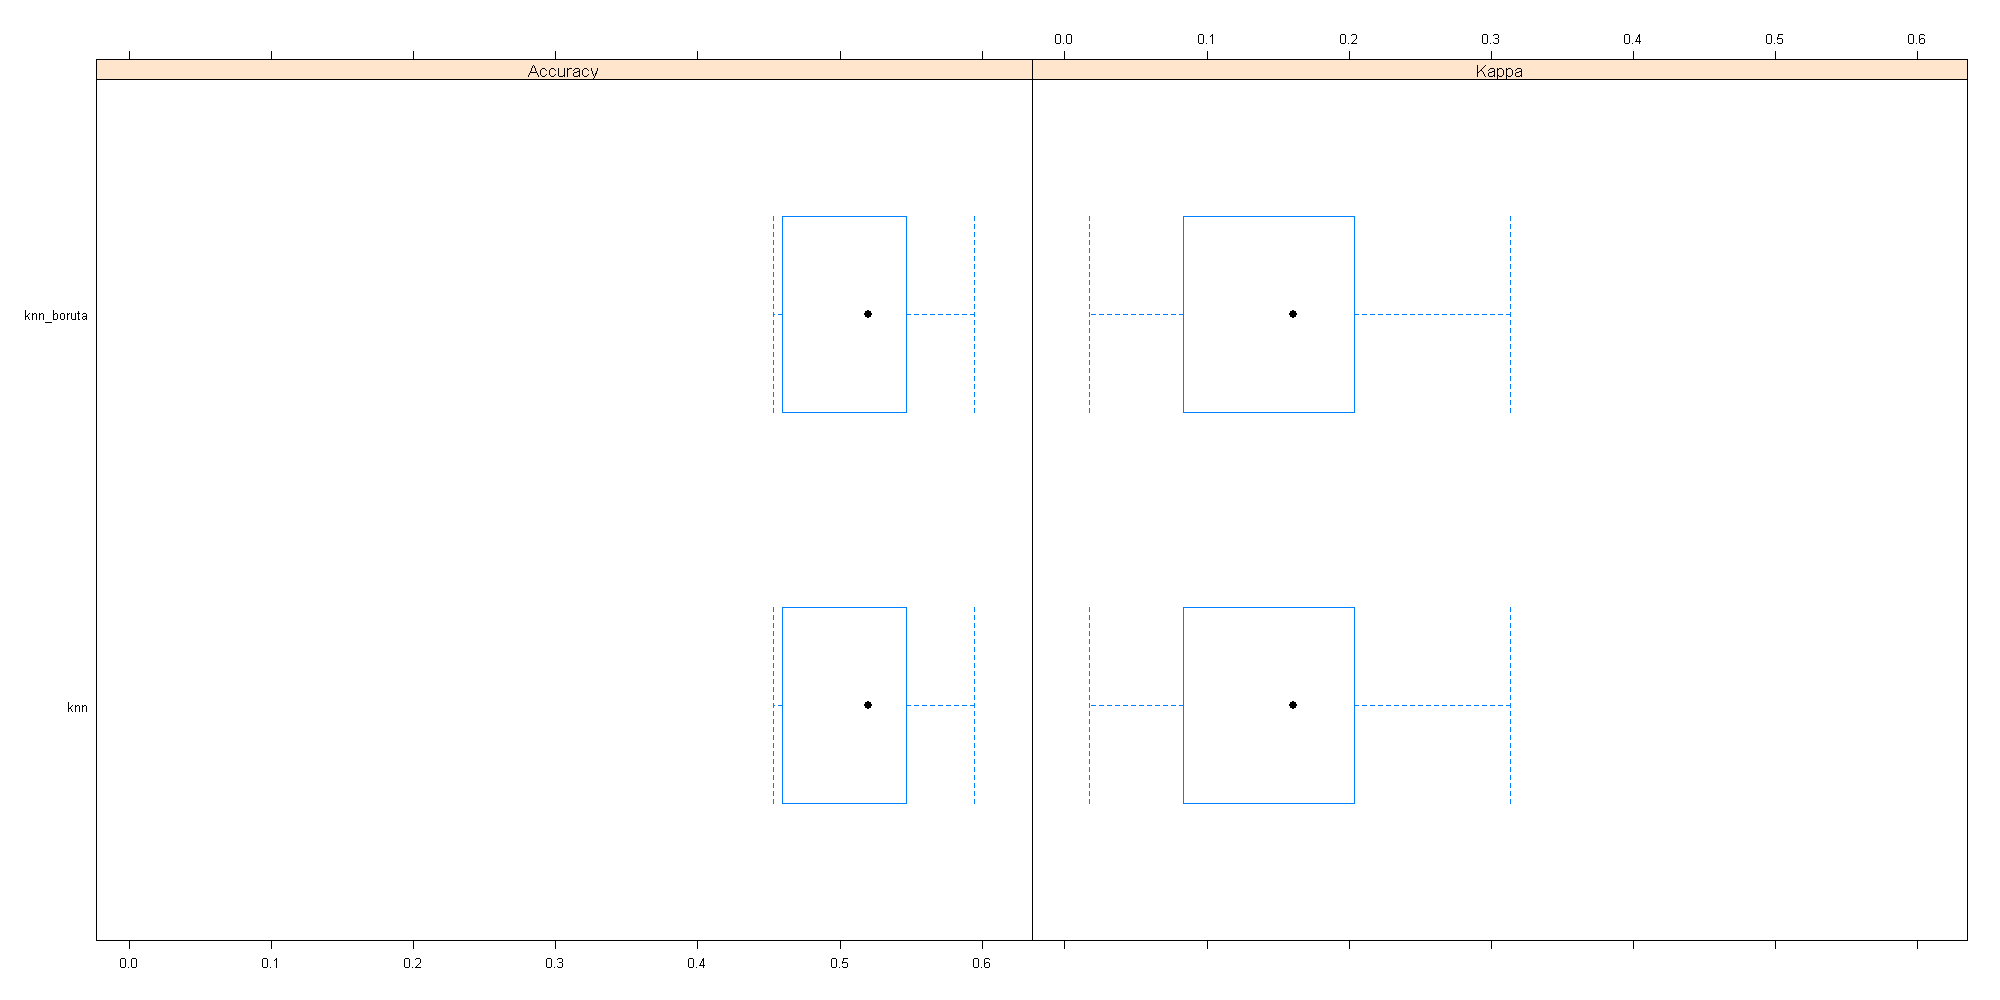

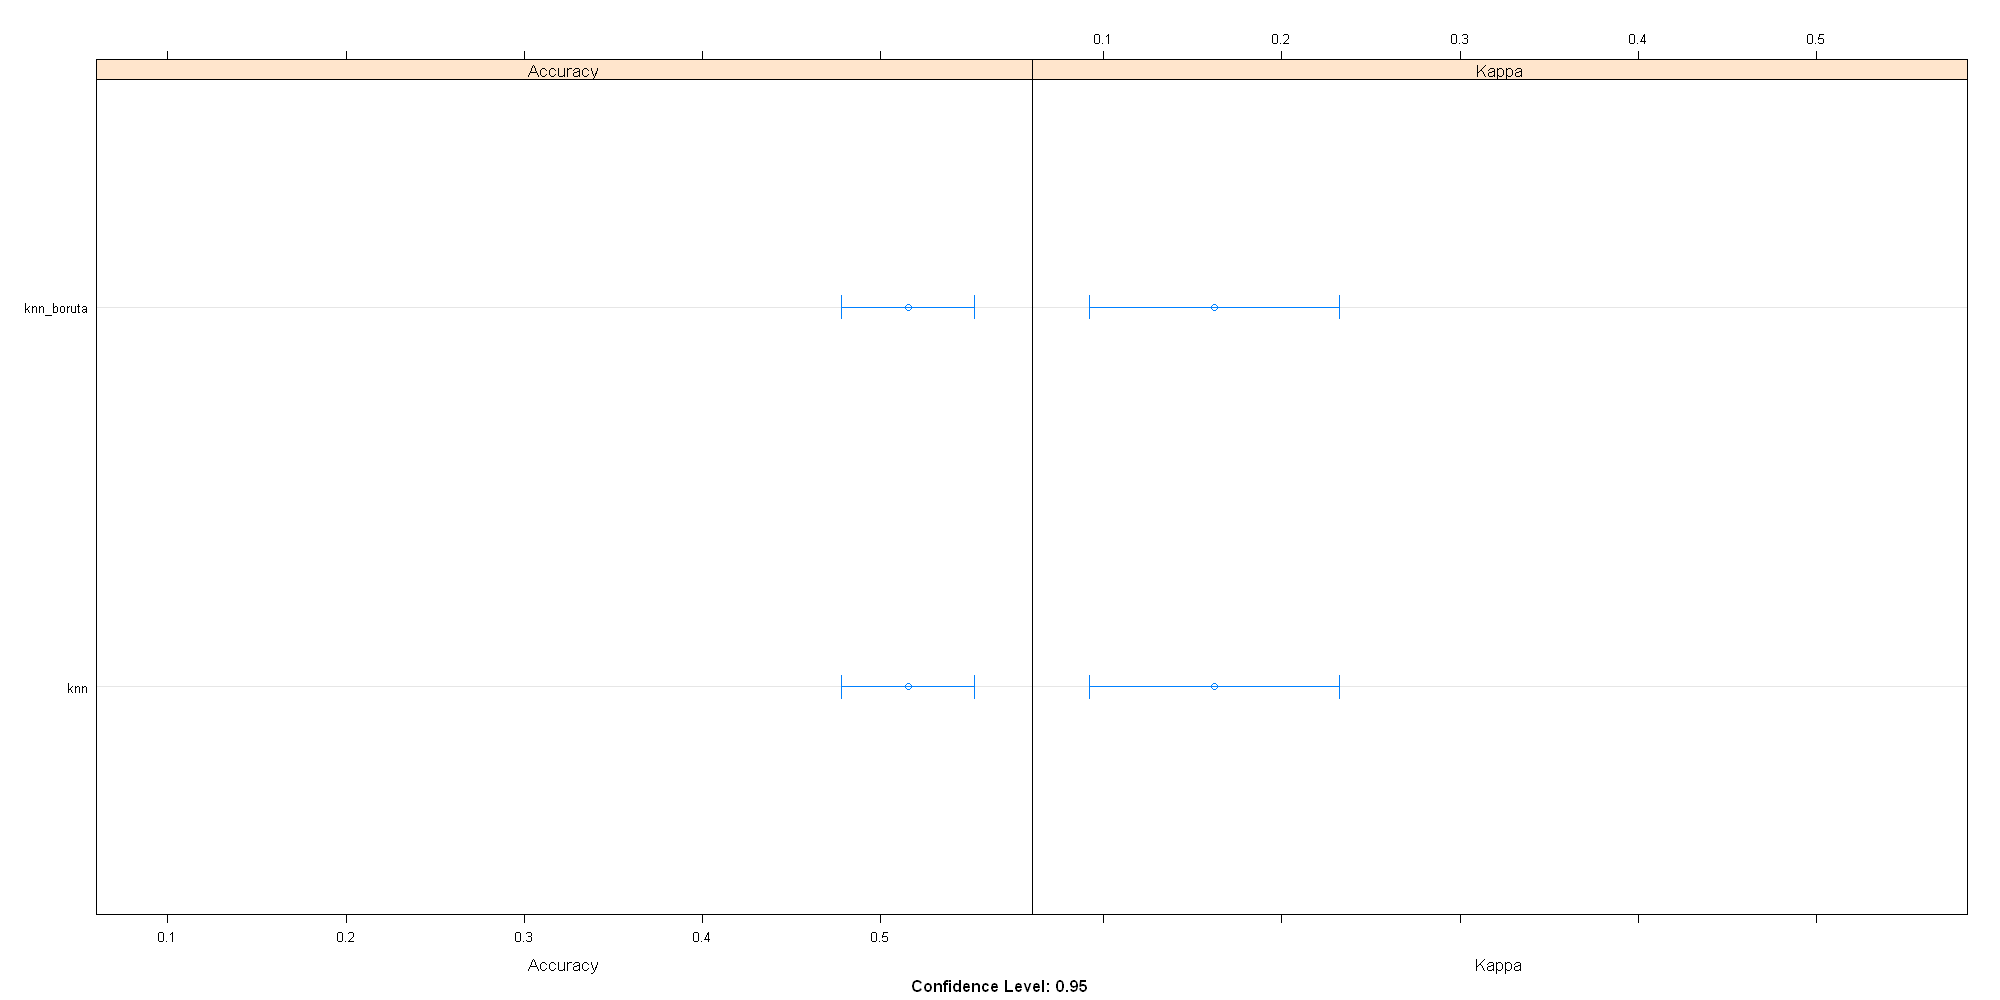

In [59]:
# collect resamples
results <- resamples(list(knn=model_knn,knn_boruta=model_knn))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

## Prediction

In [61]:
pred_knn <- predict(model_knnB,test)  
pred_knn.prob <- predict(model_knnB,test, type="prob")


result <- confusionMatrix(TestClasses,  pred_knn) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         124         23      9
  Complicato           71         49      2
  Ottimo               25          3     15

Overall Statistics
                                          
               Accuracy : 0.5857          
                 95% CI : (0.5296, 0.6401)
    No Information Rate : 0.6854          
    P-Value [Acc > NIR] : 0.9999          
                                          
                  Kappa : 0.2696          
                                          
 Mcnemar's Test P-Value : 4.658e-07       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5636            0.6533       0.57692
Specificity                      0.6832            0.7033       0.90508
Pos Pred Value                   0.7949            0.4016       0.34884
Neg Pred Value                   0.4182           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5636364,0.6831683,0.7948718,0.4181818,0.7948718,0.5636364,0.6595745,0.68535826,0.38629283,0.4859813,0.6234023
Class: Complicato,0.6533333,0.7032520,0.4016393,0.8693467,0.4016393,0.6533333,0.4974619,0.23364486,0.15264798,0.3800623,0.6782927
Class: Ottimo,0.5769231,0.9050847,0.3488372,0.9604317,0.3488372,0.5769231,0.4347826,0.08099688,0.04672897,0.1339564,0.7410039


In [62]:
roc_knn <- multiclass.roc(TestClasses, as.numeric(pred_knn))
roc_knn



Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_knn))

Data: as.numeric(pred_knn) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.5988

In [63]:
pred_knn.prob

Accettabile,Complicato,Ottimo
0.4356340,0.170775052,0.393590954
0.5161503,0.478511502,0.005338193
0.6998764,0.170452599,0.129670995
0.7356337,0.204715955,0.059650314
0.6402869,0.224914324,0.134798786
0.5800651,0.292400656,0.127534211
0.4914549,0.036360801,0.472184296
0.5391593,0.084089658,0.376751032
0.4282664,0.038634907,0.533098705
0.1798697,0.818437086,0.001693166
